<a href="https://colab.research.google.com/github/dilaraozcerit/Data-Science/blob/main/EDA_scout_car_phase_1(Data_Cleaning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

#  The Capstone Project of Data Analytics Module

# Car Price Prediction EDA

## Introduction
Welcome to "***Car Price Prediction EDA Project***". This is the capstone project of ***Data Analytics*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

# PART- 1 `( Data Cleaning )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df = pd.read_json("scout_car.json", lines=True)

In [3]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [5]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [6]:
df["Comfort_Convenience"] = df["\nComfort & Convenience\n"]
df["Entertainment_Media"] = df["\nEntertainment & Media\n"]
df["Extras"] = df["\nExtras\n"]
df["Safety_Security"] = df["\nSafety & Security\n"]

In [7]:
drop_columns = ["\nComfort & Convenience\n","\nEntertainment & Media\n","\nExtras\n","\nSafety & Security\n"]
df.drop(drop_columns, axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [9]:
df.shape

(15919, 54)

In [10]:
df.isnull().sum()*100/df.shape[0]

url                               0.000
make_model                        0.000
short_description                 0.289
body_type                         0.377
price                             0.000
vat                              28.350
km                                0.000
registration                      0.000
prev_owner                       42.892
kW                              100.000
hp                                0.000
Type                              0.013
Previous Owners                  41.711
Next Inspection                  77.794
Inspection new                   75.300
Warranty                         34.047
Full Service                     48.395
Non-smoking Vehicle              54.916
null                              0.000
Make                              0.000
Model                             0.000
Offer Number                     19.945
First Registration               10.032
Body Color                        3.750
Paint Type                       36.259


**Droping columns that have %90 percent and higher of missing values.**

In [11]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

In [12]:
show_nans(df,90)

kW                              100.000
Electricity consumption          99.139
Last Service Date                96.445
Other Fuel Types                 94.472
Availability                     96.011
Last Timing Belt Service Date    99.899
Available from                   98.291
dtype: float64

In [13]:
drop_columns = show_nans(df,90).index
drop_columns

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [14]:
df.drop(drop_columns, axis = 1, inplace = True)

In [15]:
df.drop("null", axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous Owners      9279 non-null   object
 12  Next Inspection      3535 non-null   object
 13  Inspection new       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full Service         8215 non-null   object
 16  Non-

## Let's examine and clean all the columns/features one by one

## url

In [17]:
df.url.value_counts(dropna=False)

https://www.autoscout24.com//offers/renault-espace-v-dci-160-energy-twin-turbo-diesel-grey-aec427bc-54f8-4c78-91c0-bc0868eab3b3                         1
https://www.autoscout24.com//offers/audi-a1-30-tfsi-sportback-neues-modell-2019-shz-pdc-gasoline-white-b4c0485a-f37e-4728-86ce-f2bf2f61afff             1
https://www.autoscout24.com//offers/opel-insignia-1-6-cdti-ecotec-edition-diesel-blue-99f0ea7d-6ecd-1576-e053-e350040add5a                              1
https://www.autoscout24.com//offers/audi-a3-spb-30-tdi-116cv-s-tronic-sport-auto-aziendale-diesel-grey-22b8896b-ccf4-46c2-b8ae-d41456a2b95d             1
https://www.autoscout24.com//offers/opel-corsa-1-2b-enjoy-bluetooth-alu-velgen-gasoline-white-8ee194de-825b-4177-bc51-4572bc68bd03                      1
                                                                                                                                                       ..
https://www.autoscout24.com//offers/opel-astra-sports-tourer-astra-k-st-turb

In [18]:
df.drop("url", axis = 1, inplace = True)

## make_model

In [19]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

## Make

In [20]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [21]:
df["Make"] = df.Make.str.strip('\n')

In [22]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [23]:
df.drop("Make", axis=1, inplace=True)

## Model

In [24]:
df.Model.value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [25]:
df["Model"] = df.Model.str[1]

In [26]:
df.Model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [27]:
df.drop("Model", axis=1, inplace=True)

## short_description

In [28]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport               64
NaN                                             46
1.4 66kW (90CV) Selective                       40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH           38
SPB 30 TFSI S tronic Admired                    35
                                                ..
J Sports Tourer Exklusiv NAVI~XENON~KAMERA       1
K 1.4 Turbo DYNAMIC 5 türig Sitzheizung, Len     1
1.4i Enjoy, INTELLINK - GPS - AIRCO              1
GS Dynamic,LED,NAVI,SITZHEIZUNG,KAMERA           1
Sportback 1.0 TFSI advanced                      1
Name: short_description, Length: 10002, dtype: int64

In [29]:
df.drop("short_description", axis = 1, inplace = True)

## description

In [30]:
df.description.value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [31]:
df.drop("description", axis = 1, inplace = True)

## body_type

In [32]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## Body

In [33]:
df.Body.value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [34]:
df.drop("Body", axis = 1, inplace = True)

## price (target column)

In [35]:
df.price.isnull().sum()

0

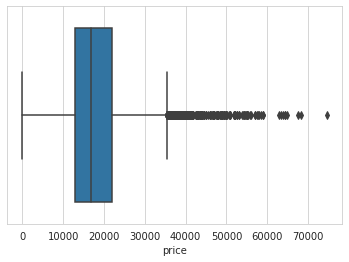

In [36]:
sns.boxplot(df.price);

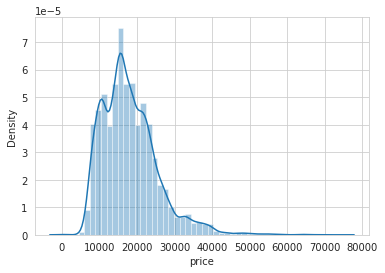

In [37]:
sns.distplot(df.price);

## vat
The Value Added Tax, or VAT, in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services.

In [38]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [39]:
df.km.value_counts(dropna=False)

10 km         1045
- km          1024
1 km           367
5 km           170
50 km          148
              ... 
98,110 km        1
20,790 km        1
110,900 km       1
36,300 km        1
11,883 km        1
Name: km, Length: 6690, dtype: int64

In [40]:
df.km.str.replace(',','').str.extract('(\d{1,8})')

,0
0,56013
1,80000
2,83450
3,73000
4,16200
...,...
15914,NaN
15915,9900
15916,15
15917,10


In [41]:
df["km"] = df.km.str.replace(',','').str.extract('(\d{1,8})')[0].astype('float')
#Function of extract returns a dataframe, that's why we have to use slicing method before changing the type of column

In [42]:
df.km.value_counts(dropna=False)

10.000       1045
nan          1024
1.000         367
5.000         170
50.000        148
             ... 
8329.000        1
267.000         1
1060.000        1
73652.000       1
49320.000       1
Name: km, Length: 6690, dtype: int64

## registration & First Registration

In [43]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
06/2018     532
04/2016     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
12/2019       1
11/2019       1
Name: registration, dtype: int64

In [44]:
df["First Registration"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

I prefer "First Registration" column because I don't need month values

In [45]:
df['First Registration'] = df['First Registration'].str[1].astype('float')

In [46]:
df["First Registration"].value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
nan         1597
Name: First Registration, dtype: int64

In [47]:
df['age'] = 2019 - df['First Registration']

In [48]:
df.age.value_counts(dropna=False)

1.000    4522
3.000    3674
2.000    3273
0.000    2853
nan      1597
Name: age, dtype: int64

In [49]:
df.drop(["registration", "First Registration"], axis=1, inplace=True)

## prev_owner & Previous Owners

In [50]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [51]:
df["Previous Owners"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n181 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.1 l/100 km (comb), \n, 7.7 l/100 km (city), \n, 5.2 l/100 km (country), \n]       1
[\n1\n, \n, 5.9 l/100 km (comb), \n, 7.9 l/100 km (city), \n, 4.8 l/100 km (country), \n]       1
[\n1\n, \n, 5.9 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n1\n, \n102 g CO2/

I prefer "Previous Owners" column because it has less NaN values

In [52]:
[item[0] if type(item) == list else item for item in df["Previous Owners"]]

['\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n0\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 nan,
 nan

In [53]:
df["Previous_Owners"] = [item[0] if type(item) == list else item for item in df["Previous Owners"]]
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [54]:
df["Previous_Owners2"] = df["Previous Owners"].apply(lambda item: item[0] if type(item) == list else item)
df["Previous_Owners2"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners2, Length: 15919, dtype: object

In [55]:
df["Previous_Owners"] = df["Previous_Owners"].str.strip("\n").astype('float')

In [56]:
df["Previous_Owners"].value_counts(dropna=False)

1.000    8294
nan      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous_Owners, dtype: int64

In [57]:
df.drop(["prev_owner", "Previous Owners", "Previous_Owners2"], axis=1, inplace=True)

## hp

In [58]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
52 kW       22
82 kW       22
78 kW       20
1 kW        20
146 kW      18
294 kW      18
141 kW      16
57 kW       10
120 kW       8
104 kW       8
112 kW       7
191 kW       7
117 kW       6
155 kW       6
184 kW       5
76 kW        4
65 kW        4
90 kW        4
168 kW       3
149 kW       3
80 kW        3
93 kW        3
98 kW        3
127 kW       2
86 kW        2
63 kW        2
40 kW        2
53 kW        2
89 kW        2
228 kW       2
140 kW       2
270 kW       2
143 kW       2
150 kW    

In [59]:
df["hp_kW"] = df.hp.str.extract('(\d{1,4})')[0].astype('float')

In [60]:
#Alternative method
#df.replace({"hp" : {" kW" : ""}}, regex = True, inplace = True)
#df["hp_kw"] = pd.to_numeric(df.hp)

In [61]:
df.drop('hp', axis=1, inplace=True)

## Type

In [62]:
df.Type.value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                  3475
[, Used, , Diesel]                                                                                                       2516
[, Used, , Gasoline]                                                                                                     2367
[, Used, , Super 95]                                                                                                     1818
[, Pre-registered, , Super 95]                                                                                            500
                                                                                                                         ... 
[, Used, , Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95 / Regular/Benzine 91]       1
[, Used, , Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98] 

In [63]:
df["Type"] = df.Type.str[1]

In [64]:
df['Type'].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection & Inspection new

In [65]:
df["Next Inspection"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                12384
\n04/2022\n                                                                                           62
\n03/2021\n                                                                                           38
\n03/2022\n                                                                                           36
\n06/2021\n                                                                                           34
                                                                                                   ...  
[\n02/2021\n, \n111 g CO2/km (comb)\n]                                                                 1
[\n07/2020\n, \n139 g CO2/km (comb)\n]                                                                 1
[\n03/2020\n, \n136 g CO2/km (comb)\n]                                                                 1
[\n01/2022\n, \n, 4 l/100 km (comb), \n, 3.8 l/100 km (

In [66]:
df["Inspection new"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n174 g CO2/km (comb)\n]                                                                 1
[\nYes\n, \n, 6 l/100 km (comb), \n, 7.7 l/100 km (city), \n, 4.9 l/100 km (country), \n]          1
[\nYes\n, \n, 5.9 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 4.9 l/100 km (country), \n]        1
[\nYes\n, \n, 6.2 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 5.4 l/100 km (country), \n]

In [67]:
df["Inspection_new"] = [item[0] if type(item) == list else item for item in df["Inspection new"]]
df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [68]:
df["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [69]:
df.drop(["Next Inspection", "Inspection new"], axis=1, inplace=True)

## Warranty

In [70]:
df.Warranty.value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                         5420
[\n, \n, \nEuro 6\n]                        1868
\n12 months\n                               1177
\n                                           979
\n24 months\n                                566
                                            ... 
[\n7 months\n, \n134 g CO2/km (comb)\n]        1
[\n48 months\n, \n142 g CO2/km (comb)\n]       1
[\n16 months\n, \nEuro 6\n]                    1
[\n60 months\n, \n166 g CO2/km (comb)\n]       1
[\n60 months\n, \nEuro 6d\n]                   1
Name: Warranty, Length: 516, dtype: int64

In [71]:
df["Warranty"] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)
df["Warranty"] = df.Warranty.str.strip("\n").str.extract('(\d{1,2})')[0].astype("float")

In [72]:
df.Warranty.value_counts(dropna=False)

nan       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
26.000        4
50.000        4
16.000        4
1.000         3
4.000         3
34.000        3
19.000        3
13.000        3
11.000        2
21.000        2
14.000        2
17.000        2
45.000        2
46.000        2
9.000         2
22.000        2
28.000        2
56.000        1
47.000        1
10.000        1
8.000         1
7.000         1
40.000        1
33.000        1
65.000        1
15.000        1
30.000        1
49.000        1
Name: Warranty, dtype: int64

## Full Service

In [73]:
df['Full Service'].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 6 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]         1
[\n, \n, \n, 5.5 l/100 km (comb), \n, 7.2 l/100 km (city), \n, 4.5 l/100 km (country), \n]       1
[\n, \n, \n, 5.8 l/100 km (comb), \n, 7.4 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7 l/100 km (city), \n, 4.5 l/100 km (country), \n]         1
[\n, \n, \

In [74]:
df.drop("Full Service", axis=1, inplace=True)

## Non-smoking Vehicle

In [75]:
df['Non-smoking Vehicle'].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [76]:
df.drop("Non-smoking Vehicle", axis=1, inplace=True)

## Offer Number

In [77]:
df['Offer Number'].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                       3175
[\nXJ38068\n]               27
[\nHM53619\n]               27
[\nLT67679\n]               27
[\nJV03654\n]               27
                          ... 
[\nE84_474_6130_158\n]       1
[\n101\n]                    1
[\n418394\n]                 1
[\nrv290009\n]               1
[\nG02394\n]                 1
Name: Offer Number, Length: 11441, dtype: int64

In [78]:
df.drop("Offer Number", axis=1, inplace=True)

## Body Color

In [79]:
df['Body Color'].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [80]:
df['Body_Color'] = df['Body Color'].str[1]

In [81]:
df['Body_Color'].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

In [82]:
df.drop("Body Color", axis=1, inplace=True)

## Body Color Original

In [83]:
df['Body Color Original'].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                             3759
[\nOnyx Schwarz\n]               338
[\nBianco\n]                     282
[\nMythosschwarz Metallic\n]     238
[\nBrillantschwarz\n]            216
                                ... 
[\nBianca - Tetto Nero\n]          1
[\ndezir rot\n]                    1
[\nnero/tetto argento met\n]       1
[\nPython Yellow Metallic\n]       1
[\nkarbongrau\n]                   1
Name: Body Color Original, Length: 1928, dtype: int64

In [84]:
df.drop("Body Color Original", axis=1, inplace=True)

## Paint Type

In [85]:
df['Paint Type'].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [86]:
df['Paint_Type'] = df['Paint Type'].str[0].str.strip('\n')

In [87]:
df['Paint_Type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [88]:
df.drop("Paint Type", axis=1, inplace=True)

## Upholstery

In [89]:
df['Upholstery'].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nVelour, Gre

In [90]:
df["Upholstery"] = [item[0] if type(item) == list else item for item in df.Upholstery]

In [91]:
df["Upholstery"] = df.Upholstery.str.strip("\n").str.split(", ")

In [92]:
df["Upholstery"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Cloth, Black]           5821
NaN                      3720
[Part leather, Black]    1121
[Cloth]                  1005
[Cloth, Grey]             891
[Cloth, Other]            639
[Full leather, Black]     575
[Black]                   491
[Grey]                    273
[Other, Other]            182
[Part leather]            140
[Full leather]            139
[Full leather, Brown]     116
[Part leather, Grey]      116
[Other, Black]            110
[Full leather, Other]      72
[Full leather, Grey]       67
[Part leather, Other]      65
[Other]                    56
[Part leather, Brown]      50
[alcantara, Black]         47
[Velour, Black]            36
[Full leather, Beige]      36
[Cloth, Brown]             28
[Velour]                   16
[Other, Grey]              15
[Cloth, Beige]             13
[Cloth, Blue]              12
[Brown]                    12
[Velour, Grey]              8
[Cloth, White]              8
[alcantara, Grey]           6
[Cloth, Red]                5
[Other, Ye

In [93]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']
df["Upholstery_type"] = df["Upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [94]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [95]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_color'] = df.Upholstery.apply(finder)

In [96]:
df["Upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_color, dtype: int64

In [97]:
df.drop("Upholstery", axis=1, inplace=True)

## Nr. of Doors

In [98]:
df["Nr. of Doors"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64

In [99]:
df['Nr_of_Doors'] = df['Nr. of Doors'].str[0].str.strip('\n').astype('float')

In [100]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
nan        212
7.000        1
1.000        1
Name: Nr_of_Doors, dtype: int64

In [101]:
df.drop("Nr. of Doors", axis=1, inplace=True)

## Nr. of Seats

In [102]:
df["Nr. of Seats"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [103]:
df['Nr_of_Seats'] = df['Nr. of Seats'].str[0].str.strip('\n').astype('float')

In [104]:
df["Nr_of_Seats"].value_counts(dropna=False)

5.000    13336
4.000     1125
nan        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64

In [105]:
df.drop("Nr. of Seats", axis=1, inplace=True)

## Model Code

In [106]:
df["Model Code"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n1844/AEN\n]        1
[\n0588/AVR\n]        1
[\n0035/AFF\n]        1
[\n1844/AFM\n]        1
[\n0035/AVN\n]        1
Name: Model Code, Length: 233, dtype: int64

In [107]:
df.drop("Model Code", axis=1, inplace=True)

## Gearing Type

In [108]:
df["Gearing Type"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [109]:
df['Gearing_Type'] = df['Gearing Type'].str[1]

In [110]:
df["Gearing_Type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

In [111]:
df.drop("Gearing Type", axis=1, inplace=True)

## Displacement

In [112]:
df["Displacement"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
NaN                 496
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,984 cc\n]       18
[\n1,200 cc\n]       18
[\n899 cc\n]         11
[\n1,397 cc\n]       11
[\n160 cc\n]          6
[\n1,499 cc\n]        5
[\n929 cc\n]          5
[\n997 cc\n]          4
[\n1,596 cc\n]        4
[\n900 cc\n]          4
[\n139 cc\n]          4
[\n1,599 cc\n]  

In [113]:
df["Displacement"] = df.Displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,5})')[0].astype("float")

In [114]:
df["Displacement_cc"] = df["Displacement"]

In [115]:
df["Displacement_cc"].value_counts(dropna=False)

1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
nan           496
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1984.000       18
1200.000       18
899.000        11
1397.000       11
160.000         6
1499.000        5
929.000         5
900.000         4
997.000         4
1596.000        4
139.000         4
1396.000        3
1599.000        3
1199.000        3
995.000         2
1495.000        2
2.000           2
1300.000        2
1589.000        2
16000.000       1
1568.000        1
1333.000        1
15898.000       1
1686.000        1
1100.000        1
1369.000  

In [116]:
df.drop("Displacement", axis=1, inplace=True)

## Cylinders

In [117]:
df["Cylinders"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [118]:
df["Cylinders"] = df.Cylinders.str[0].str.strip('\n').astype("float")

In [119]:
df["Cylinders"].value_counts(dropna=False)

4.000    8105
nan      5680
3.000    2104
5.000      22
6.000       3
2.000       2
8.000       2
1.000       1
Name: Cylinders, dtype: int64

## Weight

In [120]:
df["Weight"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,030 kg\n]       1
[\n1,206 kg\n]       1
[\n1,492 kg\n]       1
[\n1,057 kg\n]       1
[\n1,939 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [121]:
df["Weight_kg"] = df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')

In [122]:
df["Weight_kg"].value_counts(dropna=False)

nan         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
900.000        1
1650.000       1
1428.000       1
2355.000       1
1523.000       1
Name: Weight_kg, Length: 435, dtype: int64

In [123]:
df.drop("Weight", axis=1, inplace=True)

## Drive chain

In [124]:
df["Drive chain"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [125]:
df['Drive_chain'] = df['Drive chain'].str[0].str.strip('\n')

In [126]:
df["Drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain, dtype: int64

In [127]:
df.drop("Drive chain", axis=1, inplace=True)

## Fuel

In [128]:
df["Fuel"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [129]:
df["Fuel"] = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [130]:
df["Fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Biogas                                  1
Others (Particulate Filter)             1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [131]:
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [132]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [133]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x
df["Fuel"] = df.Fuel.apply(fueltype)

In [134]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [135]:
#alternative method
#df["fuel_new"] = df.Fuel.str[1]
#diesel_bool = df["fuel_new"].str.contains("diesel", case = False, regex = True)
#lpg_bool = df["fuel_new"].str.contains("lpg|cng|bio|domestic|electric", case = False, regex = True)
#df.loc[diesel_bool, "fuel_new"] = "Diesel"
#df.loc[lpg_bool, "fuel_new"] = "LPG/CNG"
#benz = list(df.fuel_new.loc[lambda x : x != "Diesel"][lambda x : x != "LPG/CNG"].index)
#df.fuel_new.iloc[benz] = "Benzine"

## Consumption

In [136]:
df["Consumption"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.6 l/100 km (comb)], [], [4.4 l/100 km (country)]]                                    1
[\n, 4.8 l/100 km (comb), \n, 5.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[7.6 l/100 km (comb)], [], []]                                                          1
[[5.6 l/100 km (comb)], [7.6 l/100 km (city)], [4.4 l/100 km (country)]]                 1
[\n, 4.7 l/100 km (comb), \n, \n, \n]                                                    1

In [ ]:
df["consump_comb"] = df.Consumption.apply(lambda i: re.findall("\d\D\d l/100 km \Wcomb", i)) # solution-1
df["consump_comb"] = df["consump_comb"].apply(lambda x: x[0][0:3] if not x==[] else x)

In [137]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [138]:
df['cons_comb'] = df.Consumption.apply(parser1).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_city'] = df.Consumption.apply(parser2).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_country'] = df.Consumption.apply(parser3).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [139]:
df["cons_comb"].value_counts(dropna=False).head()

nan      2033
5.400     770
3.900     733
4.000     713
5.100     657
Name: cons_comb, dtype: int64

In [140]:
df.drop('Consumption', axis=1,inplace=True)

## CO2 Emission

In [141]:
df["CO2 Emission"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n193 g CO2/km (comb)\n]         1
[\n171 g CO2/km (comb)\n]         1
[\n990 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]       1
[\n183 g CO2/km (comb)\n]         1
Name: CO2 Emission, Length: 124, dtype: int64

In [142]:
df["CO2_Emission"] = [item[0] if type(item) == list else item for item in df["CO2 Emission"]]
df["CO2_Emission"] = df["CO2_Emission"].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", ".").astype("float")

In [143]:
df["CO2_Emission"].value_counts(dropna=False)

nan        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
45.000        1
331.000       1
181.000       1
193.000       1
253.000       1
Name: CO2_Emission, Length: 121, dtype: int64

In [144]:
df.drop("CO2 Emission", axis=1, inplace=True)

## Emission Class

In [145]:
df["Emission Class"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [146]:
df["Emission_Class"] = [item[0] if type(item) == list else item for item in df["Emission Class"]]
df["Emission_Class"] = df["Emission_Class"].str.strip("\n")

In [147]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [148]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [149]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [150]:
df.drop("Emission Class", axis=1, inplace=True)

## Emission Label

In [151]:
df["Emission Label"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [152]:
df.drop("Emission Label", axis=1, inplace=True)

## Gears

In [153]:
df["Gears"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [154]:
df["Gears"] = df.Gears.str[0].str.strip('\n')

In [155]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
3         2
1         2
4         2
50        1
2         1
Name: Gears, dtype: int64

## Country version

In [156]:
df["Country version"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
Name: Country version, dtype: int64

In [157]:
df.drop("Country version", axis=1, inplace=True)

## Comfort_Convenience

In [158]:
df["Comfort_Convenience"].value_counts(dropna=False).head()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [159]:
df["Comfort_Convenience"] = [",".join(item) if type(item) == list else item for item in df["Comfort_Convenience"]]

In [160]:
df["Comfort_Convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

## Entertainment_Media

In [161]:
df["Entertainment_Media"].value_counts(dropna=False).head()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                 1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                    1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]     783
[On-board computer, Radio]                                                           487
Name: Entertainment_Media, dtype: int64

In [162]:
df["Entertainment_Media"] = [",".join(item) if type(item) == list else item for item in df["Entertainment_Media"]]

In [163]:
df["Entertainment_Media"].value_counts(dropna=False).head()

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Name: Entertainment_Media, dtype: int64

## Extras

In [164]:
df["Extras"].value_counts(dropna=False).head()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                 3245
NaN                                            2962
[Alloy wheels, Touch screen]                    697
[Alloy wheels, Voice Control]                   577
[Alloy wheels, Touch screen, Voice Control]     541
Name: Extras, dtype: int64

In [165]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [166]:
df["Extras"].value_counts(dropna=False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: Extras, dtype: int64

## Safety_Security

In [167]:
df["Safety_Security"].value_counts(dropna=False).head()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                       982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                            480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure moni

In [168]:
df["Safety_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_Security"]]

In [169]:
df["Safety_Security"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

## The End of Part-1

In [170]:
df.shape

(15919, 33)

In [171]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,56013.000,80000.000,83450.000,73000.000,16200.000
Type,Used,Used,Used,Used,Used
Warranty,NaN,NaN,NaN,NaN,NaN
Cylinders,3.000,4.000,NaN,3.000,3.000
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,NaN,7,NaN,6,NaN


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Warranty             4853 non-null   float64
 7   Cylinders            10239 non-null  float64
 8   Fuel                 15919 non-null  object 
 9   Gears                11207 non-null  object 
 10  Comfort_Convenience  14999 non-null  object 
 11  Entertainment_Media  14545 non-null  object 
 12  Extras               12957 non-null  object 
 13  Safety_Security      14937 non-null  object 
 14  age                  14322 non-null  float64
 15  Previous_Owners      9279 non-null  

In [173]:
df.to_csv("clean_scout.csv", index=False)